## **Final Project submission**

Course Name: Applications of AI and ML for Chemical Engineering

Course Code: CL653

Name-Rohit Kumar Dayalani

Roll no.-220107072

water potability test using knn

# IMPORTING LIBRARIES

In [108]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# LOADING DATASET

In [109]:
# Making data frame from csv
Data = pd.read_csv('/content/water_potability(1).csv')
rohit_df= pd.DataFrame(Data)
rohit_df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [110]:
rohit_df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

## Column Description

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

# <font color = 'black'>EDA <font>  <font color = 'black'> <font color = 'black'>AND<font color = 'black'> PREPROCESSING <font>

In [111]:
rohit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [112]:
rohit_df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [113]:
rohit_df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

 # Multivariate Analysis: Using Pairplots

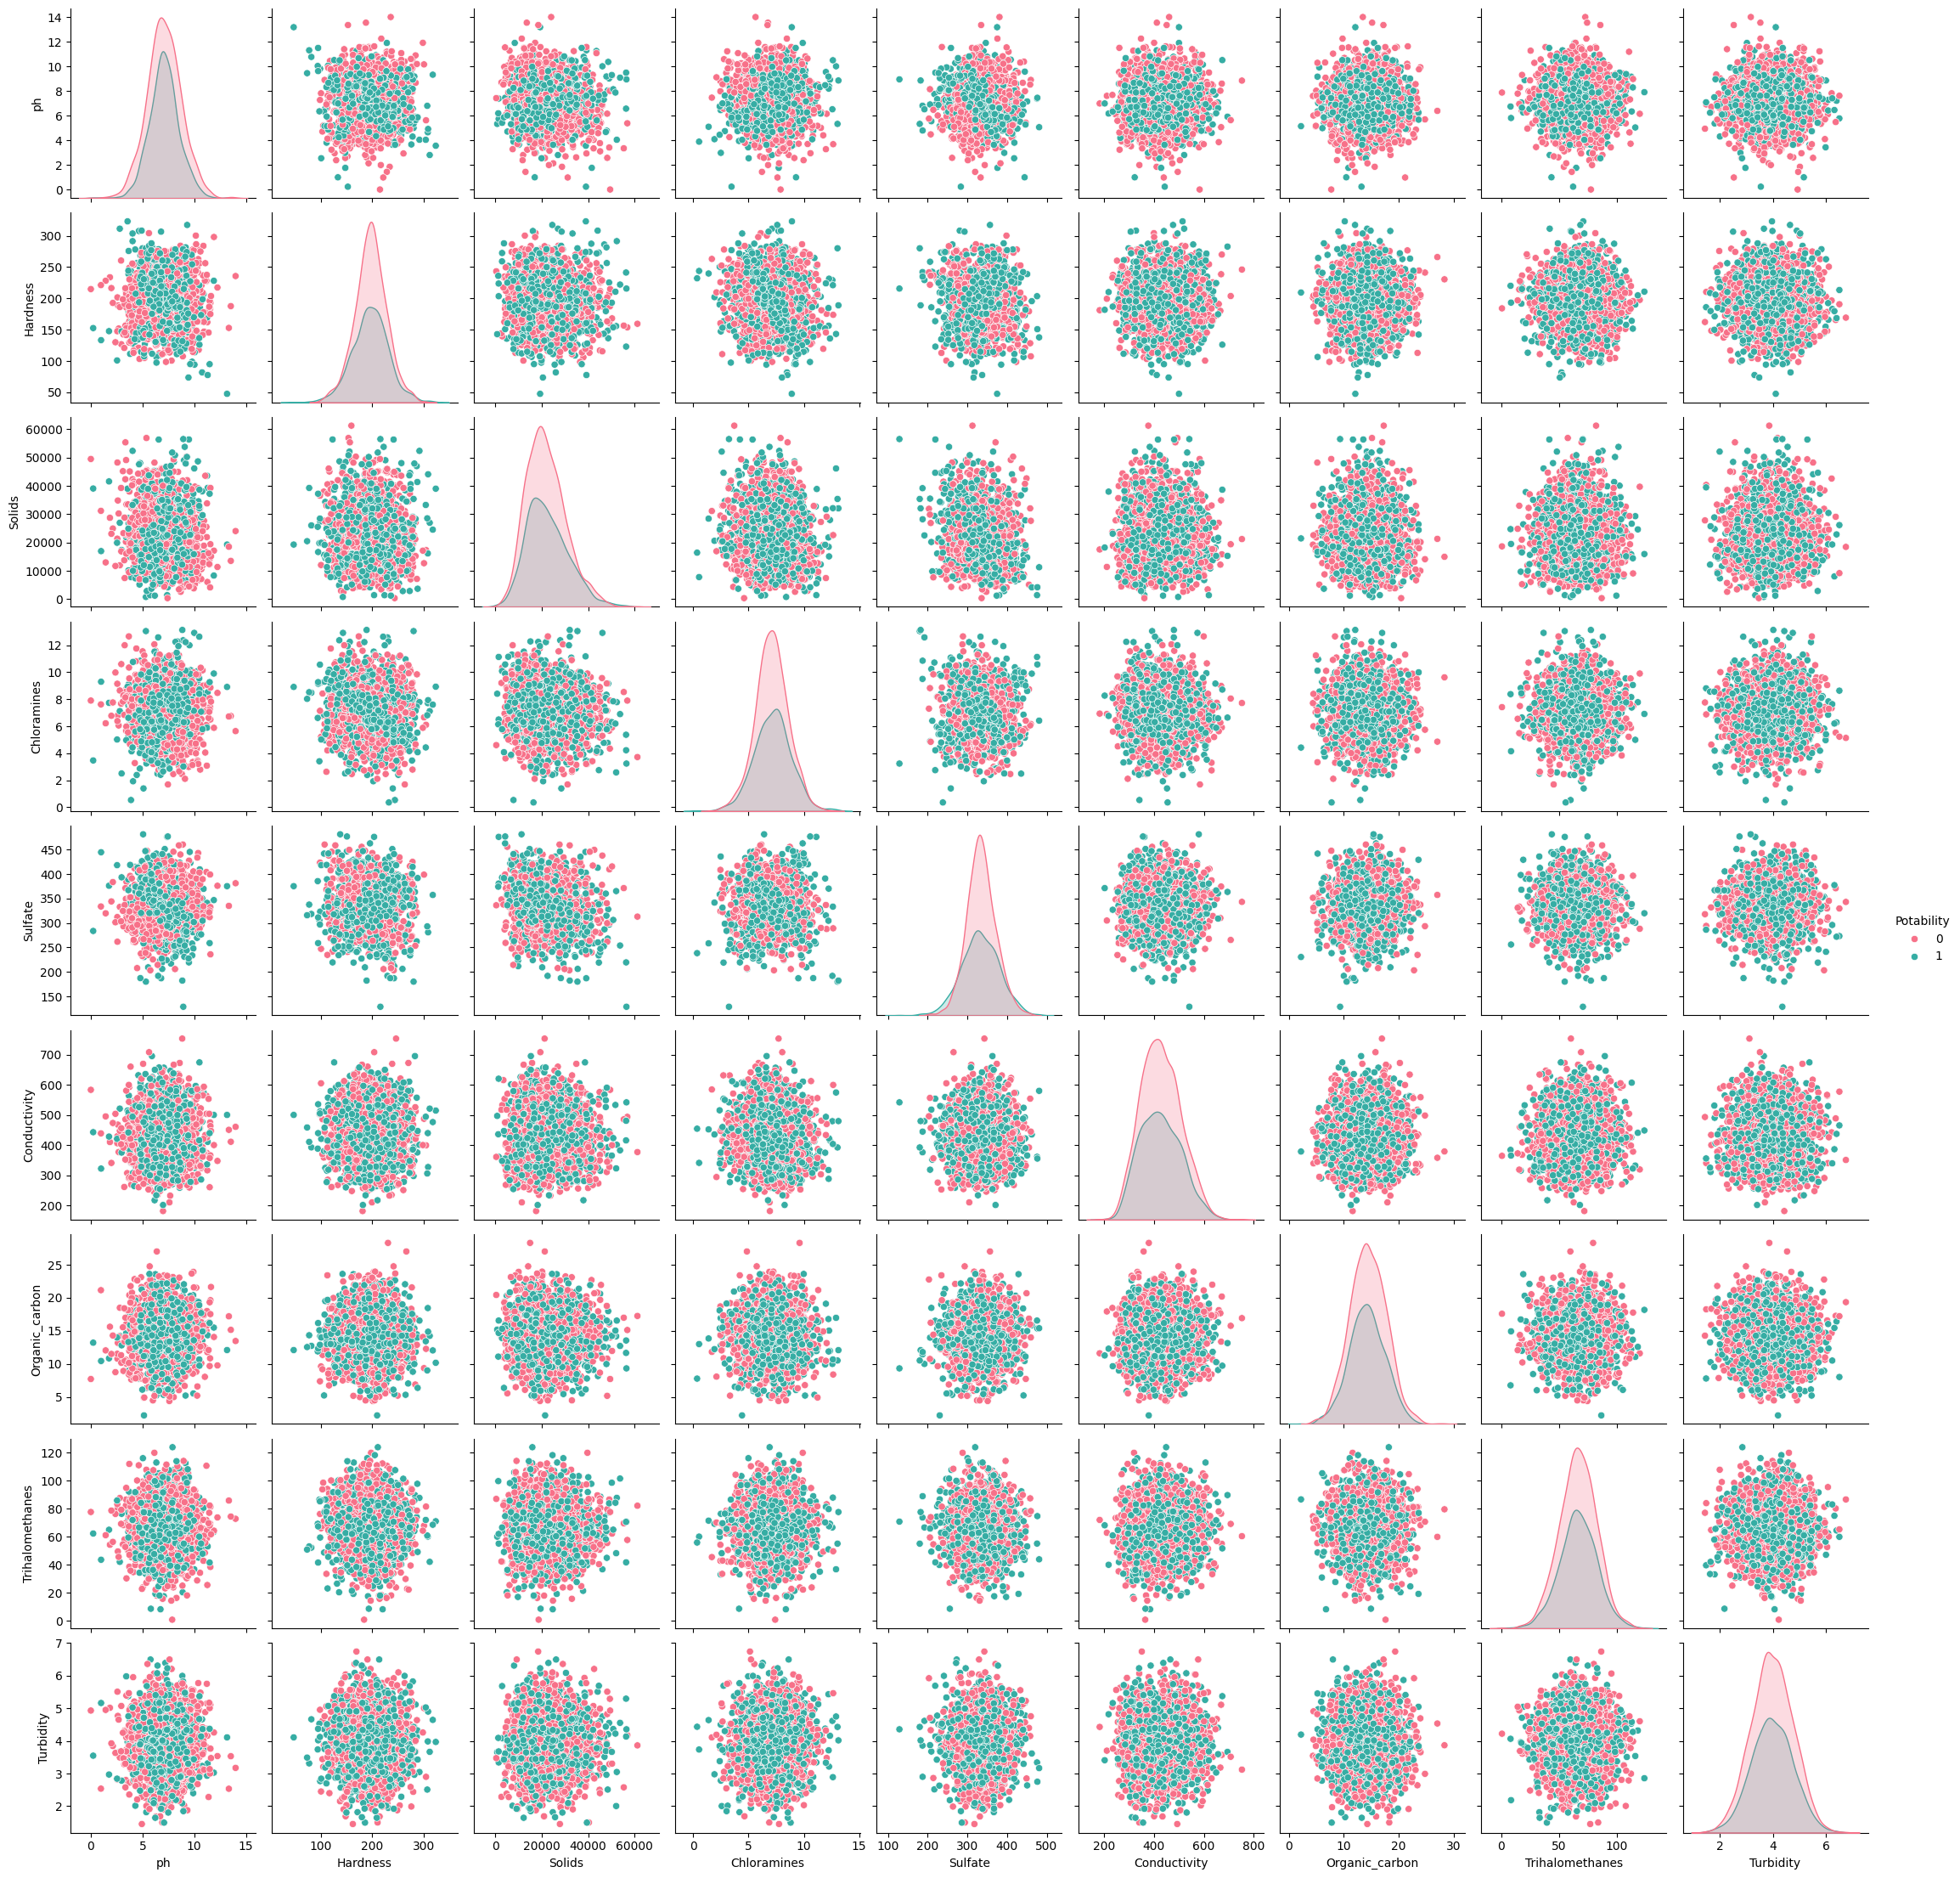

In [114]:
sns.pairplot(rohit_df, hue="Potability", palette="husl",diag_kind="kde")
plt.show()

In [115]:
rohit_df.shape

(3276, 10)

In [116]:
rohit_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Correlation

Text(0.5, 1.0, 'Features Correlating with Potability')

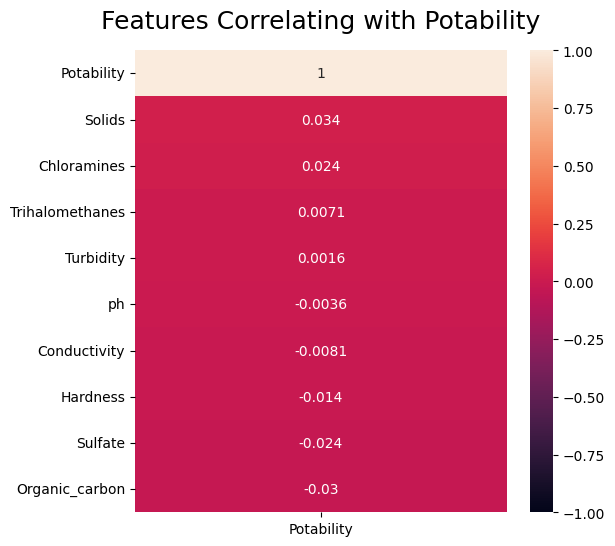

In [117]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(rohit_df.corr()[['Potability']].sort_values(by='Potability', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Potability', fontdict={'fontsize':18}, pad=16)

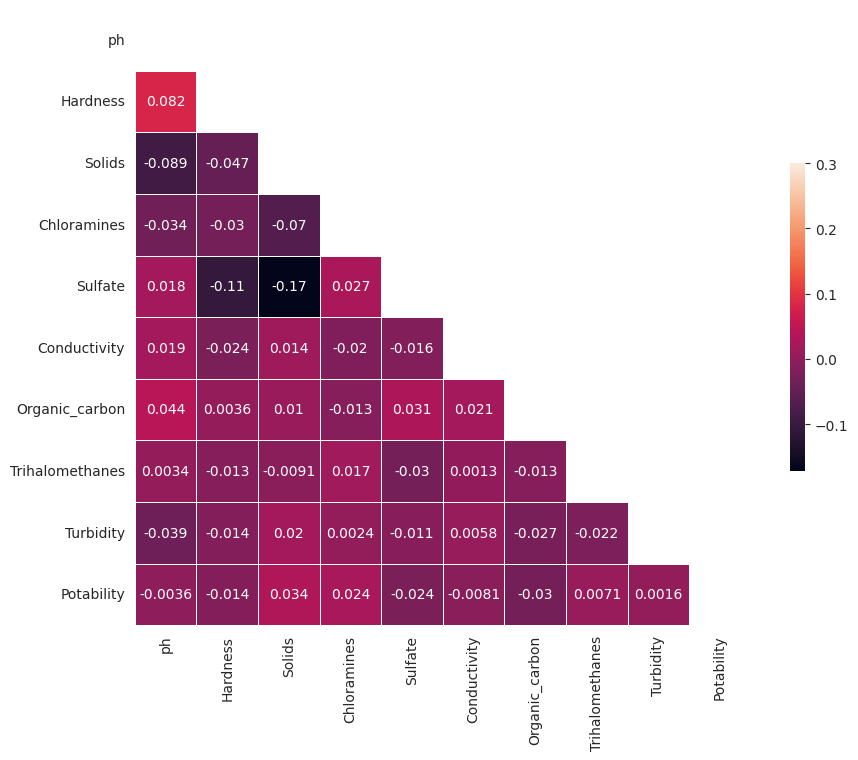

In [118]:
corr = rohit_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### We handle the missing values, we fill the missing values in our feachers using a mean value of each feature.

In [119]:
rohit_df.fillna(rohit_df.mean(), inplace = True)
rohit_df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [120]:
rohit_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Data visualization

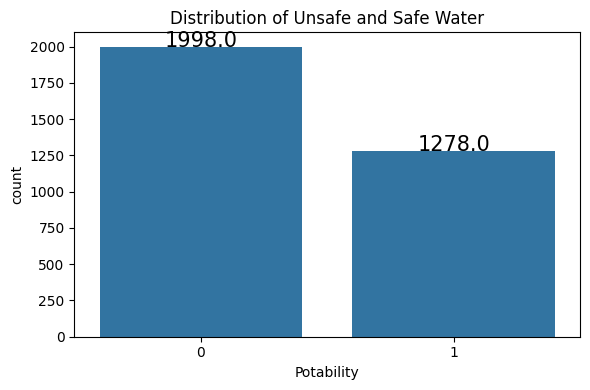

In [121]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x = rohit_df['Potability'], data = rohit_df)
plt.title("Distribution of Unsafe and Safe Water")
# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.7,rect.get_height(),horizontalalignment='center', fontsize = 15)

plt.tight_layout()
plt.show()

In [122]:
rohit_df["Potability"].value_counts(normalize=True)*100

Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64

In [123]:
plt.figure(figsize=(6, 4))
fig = px.pie(rohit_df, names="Potability")
fig.show()

<Figure size 600x400 with 0 Axes>

### The ph value of the water is an important factor in evaluating the acid-base balance of the water. The pH value of drinking water should be between 6.5 and 8.5.

In [124]:
figure = px.histogram(rohit_df, x = "ph",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: PH")
figure.show()

### The hardness of water usually depends on its source, but water with a hardness of 120-200 milligrams is drinkable.

In [125]:
figure = px.histogram(rohit_df, x = "Hardness",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Hardness")
figure.show()

###  All organic and inorganic minerals present in water are called dissolved solids. Water with a very high number of dissolved solids is highly mineralized.

In [126]:
figure = px.histogram(rohit_df, x = "Solids",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Solids")
figure.show()

### Chloramine and chlorine are disinfectants used in public water systems.

In [127]:
figure = px.histogram(rohit_df, x = "Chloramines",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Chloramines")
figure.show()

### Sulfate is a substance naturally present in minerals, soil, and rocks. Water containing less than 500 milligrams of sulfate is safe to drink.

In [128]:
figure = px.histogram(rohit_df, x = "Sulfate",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

### Water is a good conductor of electricity, but the purest form of water is not a good conductor of electricity. Water with an electrical conductivity of less than 500 is drinkable.

In [129]:
figure = px.histogram(rohit_df, x = "Conductivity",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

### Organic carbon comes from the breakdown of natural organic materials and synthetic sources. Water containing less than 25 milligrams of organic carbon is considered safe to drink.

In [130]:
figure = px.histogram(rohit_df, x = "Organic_carbon",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Organic Carbon")
figure.show()

### Trihalomethanes or THMs are chemicals found in chlorine-treated water. Water containing less than 80 milligrams of THMs is considered safe to drink.

In [131]:
figure = px.histogram(rohit_df, x = "Trihalomethanes",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Trihalomethanes")
figure.show()

### The turbidity of water depends on the number of solids present in suspension. Water with a turbidity of fewer than 5 milligrams is considered drinkable.

In [132]:
figure = px.histogram(rohit_df, x = "Turbidity",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Turbidity")
figure.show()

# <font color = 'redd'>Water Quality Prediction:<font color = 'black'>

# 1. KNN Algorithm

In [133]:
#rohit_df cols
x = pd.DataFrame(rohit_df, columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                                'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']).values
y = rohit_df['Potability'].values.reshape(-1, 1) #Target variable
x

array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
        8.69909705e+01, 2.96313538e+00, 0.00000000e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        5.63290763e+01, 4.50065627e+00, 0.00000000e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        6.64200925e+01, 3.05593375e+00, 0.00000000e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        6.98454003e+01, 3.29887550e+00, 1.00000000e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        7.74882131e+01, 4.70865847e+00, 1.00000000e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        7.86984463e+01, 2.30914906e+00, 1.00000000e+00]])

In [134]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)

In [135]:
K = 5
clf = KNeighborsClassifier(K)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

In [136]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.5405405405405406


## Create a For loop to find optimal K

In [137]:
K = 20
Acc = np.zeros((K))
for i in range(1, K+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train, y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i-1] = metrics.accuracy_score(y_test, y_pred)
Acc

array([0.5440279 , 0.59808195, 0.55013078, 0.57279861, 0.54054054,
       0.5902354 , 0.57018309, 0.59982563, 0.59546643, 0.59459459,
       0.60331299, 0.60767219, 0.59808195, 0.61726242, 0.60767219,
       0.60854403, 0.60505667, 0.62074978, 0.60767219, 0.6146469 ])

In [138]:
print(np.max(Acc))
print(np.min(Acc))

0.6207497820401047
0.5405405405405406


### try KNN for different k nearest neighbor from 1 to 30 through plotting

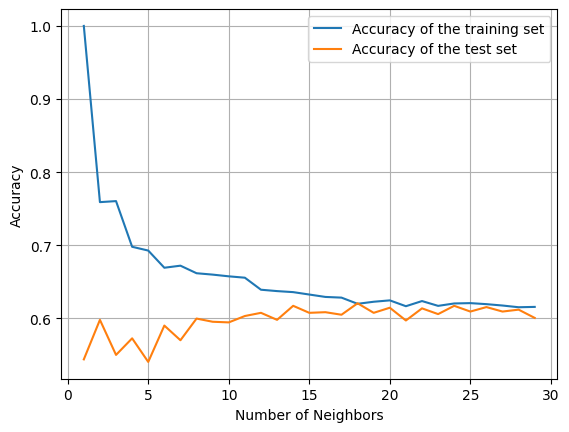

In [139]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_setting = range(1, 30)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train.ravel())
    training_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))
plt.plot(neighbors_setting, training_acc, label = 'Accuracy of the training set')
plt.plot(neighbors_setting, test_acc, label = 'Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid(True)
plt.legend()
plt.show()

## <font color = 'redddd'>According to above codes and plot the optimal K is <font color = 'red'>18<font><font color = 'black'>

# Improve Model

#### Apply GridSearchCV to optomize parameters

In [140]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1, 31)}

# defining parameter range
grid_kn = GridSearchCV(estimator = knn, # Model
                       param_grid = parameters, # Range of K
                       scoring='accuracy',  # Evaluation on test set
                       cv=5, # Cross Validation
                       verbose = 1, # Time to calculate
                       n_jobs = -1) # Help to CPU  ====> For big dataset

# fitting the model for grid search
grid_kn.fit(x_train, y_train.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy',
             verbose=1)

In [141]:
grid_kn.best_params_

{'n_neighbors': 24}

In [142]:
grid_kn.best_score_

np.float64(0.5922938414802541)

#### Using GridSearchCV is not a good help here!!!

 > <font color='red'> **Then we can say that the best value k is 18.** <font>
  *   Accuracy of model at K=18 is  0.62

In [143]:
import pickle
from sklearn.neighbors import KNeighborsClassifier

# Define input and output
x = rohit_df.drop("Potability", axis=1)
y = rohit_df["Potability"]

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)

# Create the model with k=18
knn_model = KNeighborsClassifier(n_neighbors=18)
knn_model.fit(x_train, y_train)

# Save the model to a pickle file
with open('knn_potability_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)
